<a href="https://colab.research.google.com/github/victorsmoreschi/Machine-Learning-Studies/blob/main/Retail_Credit_synthetic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Analysis Test

* `person_age` = Age
* `person_income` =	Annual Income
* `person_home_ownership`	= Home ownership
* `person_emp_length`	= Employment length (in years)
* `loan_intent`	= Loan intent
* `loan_grade`	= Loan grade
* `loan_amnt`	= Loan amount
* `loan_int_rate`	= Interest rate
* `loan_status`	= Loan status (0 is non default 1 is default)
* `loan_percent_income`	= Percent income
* `cb_person_default_on_file`	= Historical default
* `cb_preson_cred_hist_length`	= Credit history length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
risk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Crédito/credit_risk_dataset.csv')


In [3]:
risk.columns = ['person_age',	'person_income',	'person_home_ownership',	'person_emp_length',
                'loan_intent',	'loan_grade',	'loan_amnt',	'loan_int_rate',	'loan_status',
                'loan_percent_of_income',	'has_defaulted',	'person_cred_hist_length']

In [4]:
risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_of_income,has_defaulted,person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Views

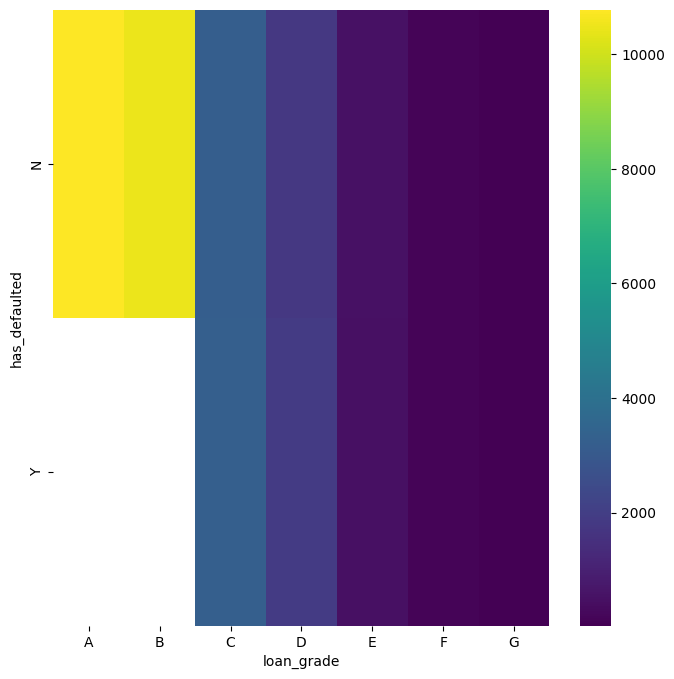

In [5]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['has_defaulted'].value_counts()
    for x_label, grp in risk.groupby('loan_grade')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('loan_grade')
_ = plt.ylabel('has_defaulted')

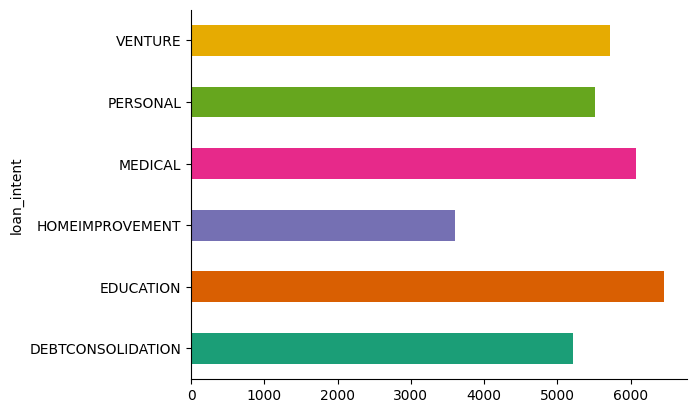

In [6]:
risk.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

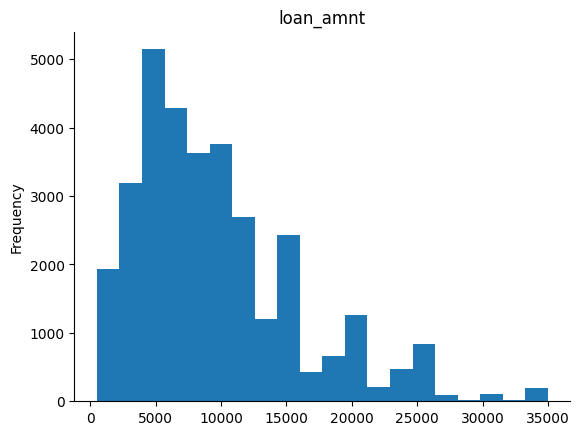

In [7]:
risk['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

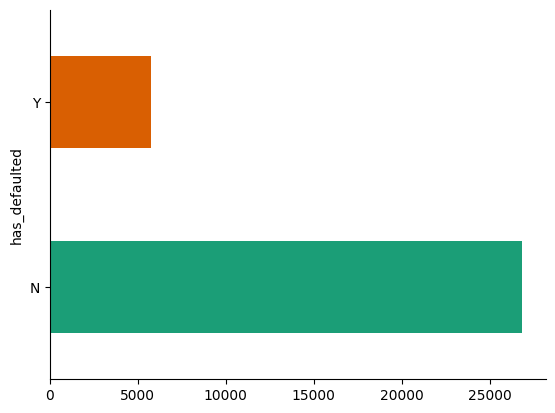

In [8]:
risk.groupby('has_defaulted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

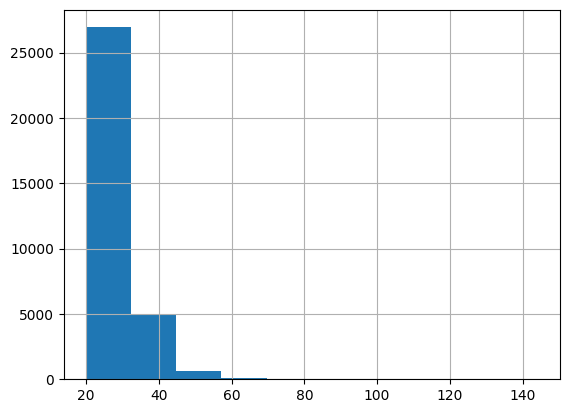

In [9]:
risk['person_age'].hist()

## Data Cleaning

I will imput the empty values by the median segmented by the loan_rating of the customer by the columns where the na is happening.

In [10]:
# Count the number of NaN values in each column
na_counts = risk.isnull().sum()
print(na_counts)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length           895
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate              3116
loan_status                   0
loan_percent_of_income        0
has_defaulted                 0
person_cred_hist_length       0
dtype: int64


In [11]:
risk_grade_group = risk.groupby('loan_grade')[['person_emp_length','loan_int_rate']].median()
risk_grade_group
for i in risk_grade_group.index:
  risk.loc[(risk['loan_grade'] == i) & (risk['person_emp_length'].isnull()), 'person_emp_length'] = risk_grade_group.loc[i, 'person_emp_length']
  risk.loc[(risk['loan_grade'] == i) & (risk['loan_int_rate'].isnull()), 'loan_int_rate'] = risk_grade_group.loc[i, 'loan_int_rate']

In [12]:
# Replace values in 'person_emp_length' greater than 60 with the column median
risk.loc[risk['person_emp_length'] > 60, 'person_emp_length'] = risk['person_emp_length'].median()

# Convert the 'person_emp_length' column to integer
risk['person_emp_length'] = risk['person_emp_length'].astype(int)


In [13]:
risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_of_income,has_defaulted,person_cred_hist_length
0,22,59000,RENT,4,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


In [14]:
for i in risk.select_dtypes(include=['int64', 'float64']).columns:
  print(i,':', risk[i].max())
  print(i,':', risk[i].min())
  print('\n')


person_age : 144
person_age : 20


person_income : 6000000
person_income : 4000


person_emp_length : 41
person_emp_length : 0


loan_amnt : 35000
loan_amnt : 500


loan_int_rate : 23.22
loan_int_rate : 5.42


loan_status : 1
loan_status : 0


loan_percent_of_income : 0.83
loan_percent_of_income : 0.0


person_cred_hist_length : 30
person_cred_hist_length : 2




In [15]:
# Replace values in 'person_emp_length' greater than 60 with the column median
risk.loc[risk['person_age'] > 100, 'person_age'] = risk['person_age'].median()

# Convert the 'person_emp_length' column to integer
risk['person_age'] = risk['person_age'].astype(int)

### Creating Dummy Variables

In [16]:
# person_home_ownership, loan_intent and loan_grade
risk = pd.get_dummies(risk, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first = True)

In [17]:
risk

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_of_income,has_defaulted,person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,4,35000,16.02,1,0.59,Y,3,False,...,False,False,True,False,False,False,True,False,False,False
1,21,9600,5,1000,11.14,0,0.10,N,2,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1,5500,12.87,1,0.57,N,3,False,...,False,True,False,False,False,True,False,False,False,False
3,23,65500,4,35000,15.23,1,0.53,N,2,False,...,False,True,False,False,False,True,False,False,False,False
4,24,54400,8,35000,14.27,1,0.55,Y,4,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13.16,0,0.11,N,30,False,...,False,False,True,False,False,True,False,False,False,False
32577,54,120000,4,17625,7.49,0,0.15,N,19,False,...,False,False,True,False,False,False,False,False,False,False
32578,65,76000,3,35000,10.99,1,0.46,N,28,False,...,True,False,False,False,True,False,False,False,False,False
32579,56,150000,5,15000,11.48,0,0.10,N,26,False,...,False,False,True,False,True,False,False,False,False,False


### Adjust Target Variable

In [18]:
historical = np.where(risk['has_defaulted'] == 'N', 0, 1)
risk['has_defaulted'] = historical

In [19]:
cleaned = risk.copy()

## Analysis

In [20]:
cleaned

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_of_income,has_defaulted,person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,4,35000,16.02,1,0.59,1,3,False,...,False,False,True,False,False,False,True,False,False,False
1,21,9600,5,1000,11.14,0,0.10,0,2,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1,5500,12.87,1,0.57,0,3,False,...,False,True,False,False,False,True,False,False,False,False
3,23,65500,4,35000,15.23,1,0.53,0,2,False,...,False,True,False,False,False,True,False,False,False,False
4,24,54400,8,35000,14.27,1,0.55,1,4,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13.16,0,0.11,0,30,False,...,False,False,True,False,False,True,False,False,False,False
32577,54,120000,4,17625,7.49,0,0.15,0,19,False,...,False,False,True,False,False,False,False,False,False,False
32578,65,76000,3,35000,10.99,1,0.46,0,28,False,...,True,False,False,False,True,False,False,False,False,False
32579,56,150000,5,15000,11.48,0,0.10,0,26,False,...,False,False,True,False,True,False,False,False,False,False


In [21]:
# List of columns to bin
columns_to_bin = ['person_age', 'person_income', 'loan_amnt','loan_int_rate','loan_percent_of_income'] # Corrected column names

# Apply pd.qcut() to multiple columns at once
cleaned[[col + '_category' for col in columns_to_bin]] = cleaned[columns_to_bin].apply(lambda x: pd.qcut(x, q=10, labels=False))

In [22]:
binned = cleaned.drop(columns_to_bin, axis=1)
columns_order = ['person_age_category',	'person_income_category',	'loan_amnt_category',	'loan_int_rate_category',	'loan_percent_of_income_category','person_emp_length',
'loan_status', 'has_defaulted', 'person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT',
'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']
binned = binned[columns_order]

In [23]:
binned

,person_age_category,person_income_category,loan_amnt_category,loan_int_rate_category,loan_percent_of_income_category,person_emp_length,loan_status,has_defaulted,person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,5,9,9,9,4,1,1,3,False,...,False,False,True,False,False,False,True,False,False,False
1,0,0,0,5,2,5,0,0,2,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0,3,6,9,1,1,0,3,False,...,False,True,False,False,False,True,False,False,False,False
3,1,6,9,8,9,4,1,0,2,False,...,False,True,False,False,False,True,False,False,False,False
4,2,4,9,8,9,8,1,1,4,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,9,4,3,7,3,1,0,0,30,False,...,False,False,True,False,False,True,False,False,False,False
32577,9,9,8,1,4,4,0,0,19,False,...,False,False,True,False,False,False,False,False,False,False
32578,9,7,9,4,9,3,1,0,28,False,...,True,False,False,False,True,False,False,False,False,False
32579,9,9,8,5,2,5,0,0,26,False,...,False,False,True,False,True,False,False,False,False,False


In [24]:
binned['person_age_category'].value_counts(True)

,proportion
person_age_category,
0,0.149688
1,0.119364
2,0.108929
6,0.108683
7,0.105031
3,0.093214
9,0.089408
8,0.083883
4,0.076179


In [25]:
binned['loan_int_rate_category'].value_counts(True)

,proportion
loan_int_rate_category,
4,0.120929
1,0.111108
8,0.106565
0,0.104325
7,0.101624
6,0.098953
3,0.098554
9,0.090973
2,0.086216


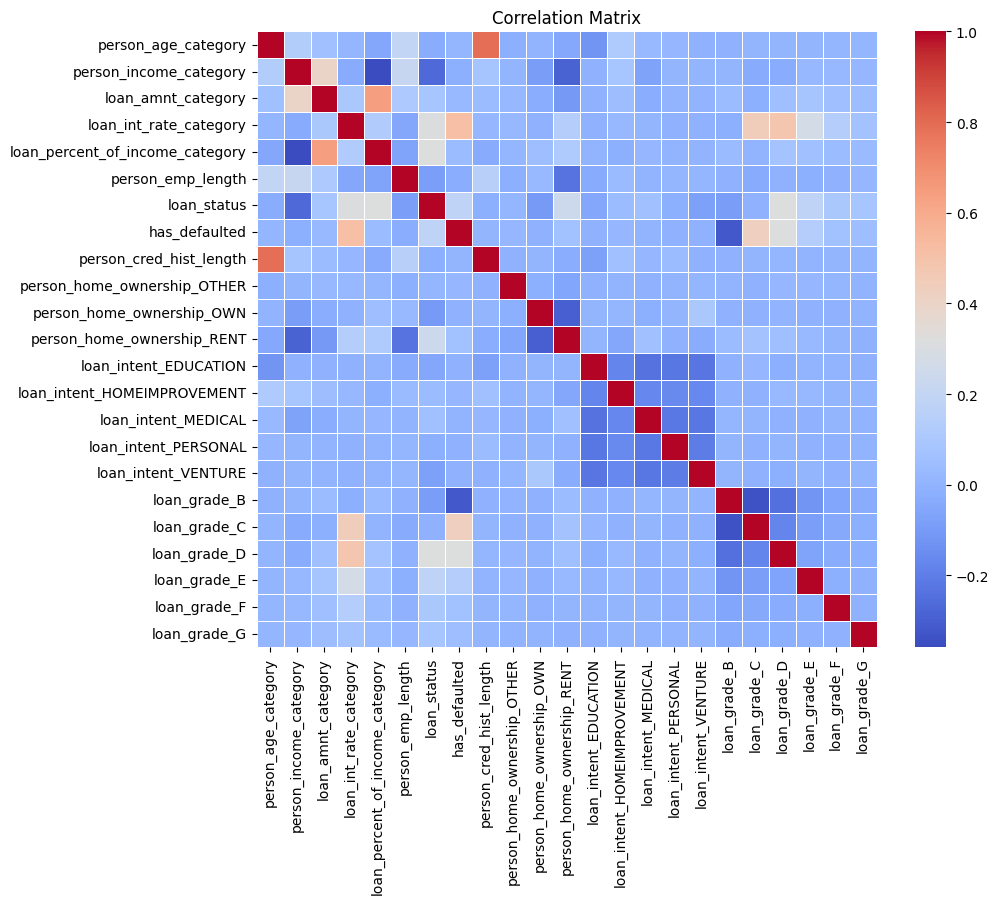

In [26]:
correlation_matrix = binned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Model

In [27]:
from sklearn.model_selection import train_test_split

X = binned.drop(columns=['loan_status'])  # Features
y = binned['loan_status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
for i in X.columns:
  print(i)

person_age_category
person_income_category
loan_amnt_category
loan_int_rate_category
loan_percent_of_income_category
person_emp_length
has_defaulted
person_cred_hist_length
person_home_ownership_OTHER
person_home_ownership_OWN
person_home_ownership_RENT
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE
loan_grade_B
loan_grade_C
loan_grade_D
loan_grade_E
loan_grade_F
loan_grade_G


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify numerical and categorical features
num_features = ['person_age_category',
'person_income_category',
'loan_amnt_category',
'loan_int_rate_category',
'loan_percent_of_income_category',
'person_emp_length',
'has_defaulted',
'person_cred_hist_length']
cat_features = [col for col in X.columns if col not in num_features]  # Dummy variables

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),  # Scale numerical features
    ('cat', 'passthrough', cat_features)  # Keep dummies as they are
])

# Logistic Regression pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Define min and max credit score range
min_score = 0
max_score = 1000

# Get probabilities and compute credit score
binned['prob_default'] = model.predict_proba(X)[:, 1]
binned['credit_score'] = min_score + (1 - binned['prob_default']) * (max_score - min_score)


In [30]:
binned

,person_age_category,person_income_category,loan_amnt_category,loan_int_rate_category,loan_percent_of_income_category,person_emp_length,loan_status,has_defaulted,person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,prob_default,credit_score
0,0,5,9,9,9,4,1,1,3,False,...,True,False,False,False,True,False,False,False,0.852252,147.747848
1,0,0,0,5,2,5,0,0,2,False,...,False,False,True,False,False,False,False,False,0.018385,981.615209
2,3,0,3,6,9,1,1,0,3,False,...,False,False,False,True,False,False,False,False,0.564991,435.009014
3,1,6,9,8,9,4,1,0,2,False,...,False,False,False,True,False,False,False,False,0.468405,531.594777
4,2,4,9,8,9,8,1,1,4,False,...,False,False,False,True,False,False,False,False,0.540730,459.270077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,9,4,3,7,3,1,0,0,30,False,...,True,False,False,True,False,False,False,False,0.071768,928.232043
32577,9,9,8,1,4,4,0,0,19,False,...,True,False,False,False,False,False,False,False,0.015687,984.312976
32578,9,7,9,4,9,3,1,0,28,False,...,False,False,True,False,False,False,False,False,0.415916,584.084049
32579,9,9,8,5,2,5,0,0,26,False,...,True,False,True,False,False,False,False,False,0.012908,987.092457


In [31]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5072
           1       0.74      0.49      0.59      1445

    accuracy                           0.85      6517
   macro avg       0.81      0.72      0.75      6517
weighted avg       0.84      0.85      0.84      6517

ROC-AUC Score: 0.864461784899523


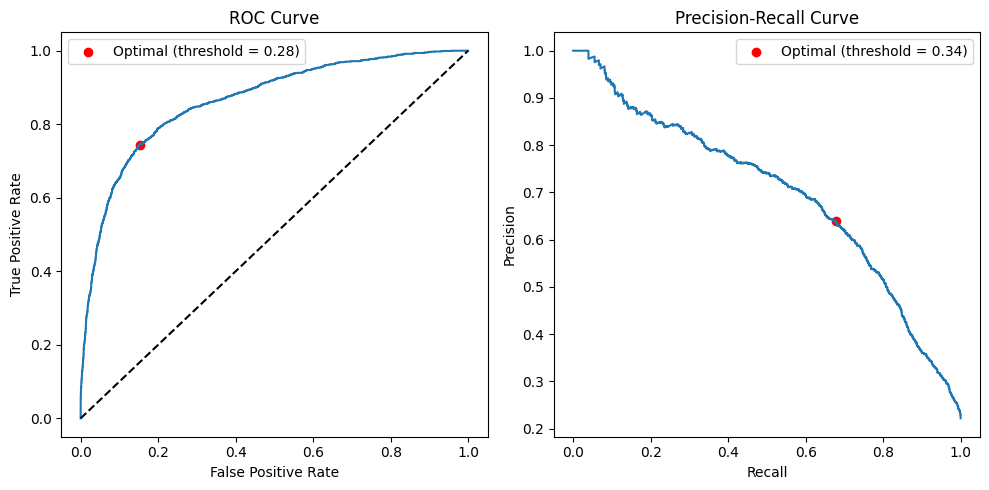

In [32]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

def optimize_threshold(y_true, y_pred_proba):
    """
    Find optimal classification threshold using ROC curve and precision-recall curve.

    Parameters:
    y_pred: True labels (0 or 1)
    y_pred_proba: Predicted probabilities for class 1

    Returns:
    dict: Different threshold options and their metrics
    """
    # Calculate ROC curve
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred_proba)

    # Calculate precision-recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_true, y_pred_proba)

    # Find threshold that maximizes Youden's J statistic (tpr - fpr)
    optimal_idx_roc = np.argmax(tpr - fpr)
    optimal_threshold_roc = roc_thresholds[optimal_idx_roc]

    # Find threshold that maximizes F1 score
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_idx_pr = np.argmax(f1_scores)
    optimal_threshold_pr = pr_thresholds[optimal_idx_pr]

    # Plot ROC curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.scatter(fpr[optimal_idx_roc], tpr[optimal_idx_roc], color='red', label=f'Optimal (threshold = {optimal_threshold_roc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.scatter(recall[optimal_idx_pr], precision[optimal_idx_pr], color='red', label=f'Optimal (threshold = {optimal_threshold_pr:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()

    # Apply different thresholds and get predictions
    def get_metrics(threshold):
        y_pred = (y_pred_proba >= threshold).astype(int)
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tp = np.sum((y_true == 1) & (y_pred == 1))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return {
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'tn': tn,
            'fp': fp,
            'fn': fn,
            'tp': tp
        }

    thresholds = {
        'default': get_metrics(0.5),
        'roc_optimal': get_metrics(optimal_threshold_roc),
        'pr_optimal': get_metrics(optimal_threshold_pr),
        'high_recall': get_metrics(0.3)  # Example of lower threshold for higher recall
    }

    return thresholds

# Example usage:
model = model
y_true = y_test
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
results = optimize_threshold(y_true, y_pred_proba)

# Print results for different thresholds
def print_threshold_comparison(results):
    print("\nThreshold Comparison:")
    print("-" * 80)
    print(f"{'Threshold Type':<15} {'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
    print("-" * 80)
    for threshold_type, metrics in results.items():
        print(f"{threshold_type:<15} {metrics['threshold']:<10.3f} {metrics['precision']:<10.3f} "
              f"{metrics['recall']:<10.3f} {metrics['f1_score']:<10.3f}")

                threshold  precision  recall  f1_score  accuracy  \
threshold_0.5        0.50      0.742   0.492     0.592     0.849   
threshold_0.29       0.29      0.587   0.737     0.653     0.827   
threshold_0.32       0.32      0.616   0.702     0.656     0.837   

                true_positives  true_negatives  false_positives  \
threshold_0.5            711.0          4825.0            247.0   
threshold_0.29          1065.0          4322.0            750.0   
threshold_0.32          1015.0          4439.0            633.0   

                false_negatives  
threshold_0.5             734.0  
threshold_0.29            380.0  
threshold_0.32            430.0  


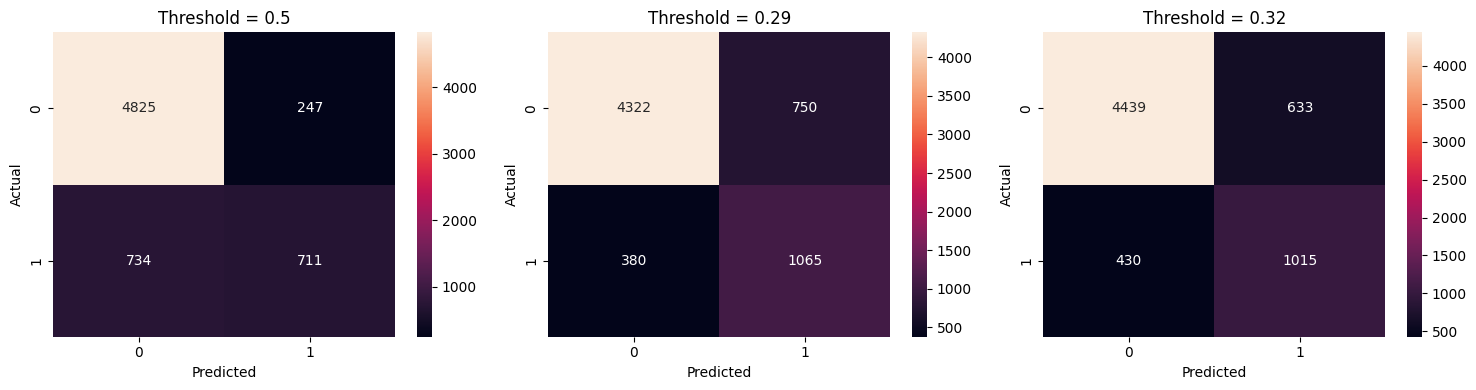

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

def compare_thresholds(y_true, y_pred_proba, thresholds=[0.5, 0.29, 0.32]):
    """
    Compare model performance with different thresholds

    Parameters:
    y_true: True labels
    y_pred_proba: Predicted probabilities
    thresholds: List of thresholds to test
    """
    results = {}

    for threshold in thresholds:
        # Apply threshold to get predictions
        y_pred = (y_pred_proba >= threshold).astype(int)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # Store results
        results[f'threshold_{threshold}'] = {
            'threshold': threshold,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'accuracy': accuracy
        }

    return results

def print_comparison_table(results):
    """Print results in a formatted table"""
    # Convert results to DataFrame for better visualization
    df = pd.DataFrame(results).T

    # Reorder columns for better readability
    columns = ['threshold', 'precision', 'recall', 'f1_score', 'accuracy',
              'true_positives', 'true_negatives', 'false_positives', 'false_negatives']
    df = df[columns]

    # Format numeric columns
    for col in df.columns:
        if col != 'threshold':
            df[col] = df[col].round(3)

    return df

# Example usage:
# Assuming you have your model predictions:
# results = compare_thresholds(y_true, y_pred_proba)
# print_comparison_table(results)

def plot_confusion_matrices(y_true, y_pred_proba, thresholds=[0.5, 0.29, 0.32]):
    """Plot confusion matrices for different thresholds"""


    fig, axes = plt.subplots(1, len(thresholds), figsize=(5*len(thresholds), 4))

    for i, threshold in enumerate(thresholds):
        y_pred = (y_pred_proba >= threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
        axes[i].set_title(f'Threshold = {threshold}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    return fig

# To use this code:

# 1. First get your model predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Compare different thresholds
results = compare_thresholds(y_true, y_pred_proba, thresholds=[0.5, 0.29, 0.32])

# 3. Print comparison table
comparison_table = print_comparison_table(results)
print(comparison_table)

# 4. Plot confusion matrices
plot_confusion_matrices(y_true, y_pred_proba, thresholds=[0.5, 0.29, 0.32])
plt.show()


In [34]:
# Get the logistic regression model from the pipeline
logistic_model = model.named_steps['logreg']  # Replace 'logistic_regression' with the actual name

# Extract coefficients and intercept
betas = logistic_model.coef_
intercepto = logistic_model.intercept_

print("Coeficientes:", betas)
print("Intercepto:", intercepto)


Coeficientes: [[-0.03683696 -0.39066652 -0.27075988  0.23852745  0.99438028 -0.01199378
   0.0125088   0.02029649  0.56985194 -1.40120625  0.81982103 -0.79097822
   0.08381963 -0.21759174 -0.57982914 -1.03310217  0.12510194  0.20687543
   2.17920044  2.42101257  2.85451303  4.36123896]]
Intercepto: [-2.19443414]


In [35]:
# Retrieve the names of features from the pipeline
feature_names = model.named_steps['preprocessor'].get_feature_names_out()  # Adjust 'preprocessor'

# Combine feature names with coefficients
coefficients = pd.DataFrame({
    "Variable": feature_names,
    "Beta (Coeficiente)": betas.flatten(),  # Flatten if coefficients are multidimensional
    "Odds Ratio": np.exp(betas).flatten()  # Compute odds ratios
})
# Retrieve the names of features from the pipeline
feature_names = model.named_steps['preprocessor'].get_feature_names_out()  # Adjust 'preprocessor'

# Combine feature names with coefficients
coefficients = pd.DataFrame({
    "Variable": feature_names,
    "Beta (Coeficiente)": betas.flatten(),  # Flatten if coefficients are multidimensional
    "Odds Ratio": np.exp(betas).flatten()  # Compute odds ratios
})

# Display the results
print(coefficients)


                                Variable  Beta (Coeficiente)  Odds Ratio
0               num__person_age_category           -0.036837    0.963833
1            num__person_income_category           -0.390667    0.676606
2                num__loan_amnt_category           -0.270760    0.762800
3            num__loan_int_rate_category            0.238527    1.269379
4   num__loan_percent_of_income_category            0.994380    2.703049
5                 num__person_emp_length           -0.011994    0.988078
6                     num__has_defaulted            0.012509    1.012587
7           num__person_cred_hist_length            0.020296    1.020504
8       cat__person_home_ownership_OTHER            0.569852    1.768005
9         cat__person_home_ownership_OWN           -1.401206    0.246300
10       cat__person_home_ownership_RENT            0.819821    2.270094
11            cat__loan_intent_EDUCATION           -0.790978    0.453401
12      cat__loan_intent_HOMEIMPROVEMENT           

In [36]:
optimal_threshold = 0.29
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

In [37]:
binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   person_age_category              32581 non-null  int64  
 1   person_income_category           32581 non-null  int64  
 2   loan_amnt_category               32581 non-null  int64  
 3   loan_int_rate_category           32581 non-null  int64  
 4   loan_percent_of_income_category  32581 non-null  int64  
 5   person_emp_length                32581 non-null  int64  
 6   loan_status                      32581 non-null  int64  
 7   has_defaulted                    32581 non-null  int64  
 8   person_cred_hist_length          32581 non-null  int64  
 9   person_home_ownership_OTHER      32581 non-null  bool   
 10  person_home_ownership_OWN        32581 non-null  bool   
 11  person_home_ownership_RENT       32581 non-null  bool   
 12  loan_intent_EDUCAT

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Convert boolean columns to numeric (0/1)
X = X.copy()
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

# Step 2: Select only numeric columns (including converted boolean columns)
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]

# Step 3: Calculate VIF for each variable
# Step 4: Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns

# Step 5: Calculate VIF for each variable
vif_data["VIF"] = [
    variance_inflation_factor(X_numeric.values, i) for i in range(len(numeric_columns))
]

# Step 6: Display the VIF results
print(vif_data)



                           Variable        VIF
0               person_age_category   8.084837
1            person_income_category  10.368360
2                loan_amnt_category  19.281365
3            loan_int_rate_category  30.373100
4   loan_percent_of_income_category  15.131794
5                 person_emp_length   2.617757
6                     has_defaulted   2.026928
7           person_cred_hist_length   8.151621
8       person_home_ownership_OTHER   1.010488
9         person_home_ownership_OWN   1.245156
10       person_home_ownership_RENT   2.410436
11            loan_intent_EDUCATION   1.978820
12      loan_intent_HOMEIMPROVEMENT   1.611484
13              loan_intent_MEDICAL   1.918911
14             loan_intent_PERSONAL   1.863365
15              loan_intent_VENTURE   1.911739
16                     loan_grade_B   5.761008
17                     loan_grade_C   9.740422
18                     loan_grade_D   8.110436
19                     loan_grade_E   3.148795
20           

In [39]:
vif_sorted = vif_data.sort_values(by="VIF", ascending=False)

In [40]:

# Set a VIF threshold
vif_threshold = 7

# Keep track of dropped variables (optional, for debugging)
dropped_variables = []

while True:
    # Calculate VIF for all variables
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Find the variable with the highest VIF
    max_vif = vif_data["VIF"].max()
    max_vif_variable = vif_data.loc[vif_data["VIF"].idxmax(), "Variable"]

    # Break the loop if all VIF values are below the threshold
    if max_vif < vif_threshold:
        print("All VIF values are below the threshold.")
        break

    # Check if the variable is still in X (avoid dropping twice)
    if max_vif_variable in X.columns:
        # Drop the variable with the highest VIF
        print(f"Dropping '{max_vif_variable}' with VIF = {max_vif}")
        X = X.drop(columns=[max_vif_variable])
        dropped_variables.append(max_vif_variable)  # Track dropped variables
    else:
        print(f"Variable '{max_vif_variable}' already dropped. Skipping.")

# Output the final VIF data and dropped variables (optional)
print("\nFinal VIF Data:")
print(vif_data)
print("\nDropped Variables:", dropped_variables)


Dropping 'loan_int_rate_category' with VIF = 30.373099753064057
Dropping 'loan_amnt_category' with VIF = 19.023386456525156
Dropping 'person_cred_hist_length' with VIF = 8.110781700939356
All VIF values are below the threshold.

Final VIF Data:
                           Variable       VIF
0               person_age_category  2.940914
1            person_income_category  3.304320
2   loan_percent_of_income_category  3.030464
3                 person_emp_length  2.587550
4                     has_defaulted  2.026760
5       person_home_ownership_OTHER  1.009179
6         person_home_ownership_OWN  1.227850
7        person_home_ownership_RENT  2.248915
8             loan_intent_EDUCATION  1.844062
9       loan_intent_HOMEIMPROVEMENT  1.558132
10              loan_intent_MEDICAL  1.822261
11             loan_intent_PERSONAL  1.754734
12              loan_intent_VENTURE  1.808211
13                     loan_grade_B  1.924444
14                     loan_grade_C  2.150178
15                 

In [41]:

# Recreate the ColumnTransformer after VIF analysis
# Identify numerical and categorical features after dropping those identified by VIF analysis
num_features = [col for col in X.columns if col in ['person_age_category', 'person_income_category',
                                                    'loan_int_rate_category', 'loan_percent_of_income_category',
                                                    'person_emp_length','has_defaulted','person_cred_hist_length']]
cat_features = [col for col in X.columns if col not in num_features]  # Dummy variables

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),  # Scale numerical features
    ('cat', 'passthrough', cat_features)  # Keep dummies as they are
])

# Logistic Regression pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_vif, y_train_vif)

# Define min and max credit score range
min_score = 0
max_score = 1000

# Get probabilities and compute credit score
binned['prob_default_vif'] = model.predict_proba(X)[:, 1]
binned['credit_score_vif'] = min_score + (1 - binned['prob_default']) * (max_score - min_score)

In [42]:
# Set a custom threshold
threshold = 0.3

# Get predicted probabilities for the positive class
y_pred_proba_vif = model.predict_proba(X_test_vif)[:, 1]

# Apply the custom threshold
y_pred_vif_thresholded = (y_pred_proba_vif >= threshold).astype(int)

# Evaluate the model using the thresholded predictions
print(classification_report(y_test, y_pred_vif_thresholded))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_vif))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      5072
           1       0.59      0.72      0.65      1445

    accuracy                           0.83      6517
   macro avg       0.75      0.79      0.77      6517
weighted avg       0.84      0.83      0.83      6517

ROC-AUC Score: 0.863677302893694
